## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> Resource </td>
        <td> Resource Consumption </td>
    </tr>
    <tr>
        <td> Production </td>
        <td> Harvest </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> <b> TomQuality </b> </td>
        <td> <b> Tomato Quality </b> </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Tomato Sensor

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/TomQuality.csv")

In [6]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      8 non-null      int64  
 1   Flavour    8 non-null      int64  
 2   TSS        8 non-null      float64
 3   Acid       8 non-null      float64
 4   %Juice     8 non-null      int64  
 5   Bite       8 non-null      int64  
 6   Weight     8 non-null      float64
 7   DMC_fruit  7 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 640.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      8 non-null      int64  
 1   Flavour    8 non-null      int64  
 2   TSS        8 non-null      float64
 3   Acid       8 non-null      float64
 4   %Juice     8 non-null      int64  
 5   Bite       8 non-null      int64  
 6   Weight 

In [7]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %time  Flavour   TSS  Acid  %Juice  Bite  Weight DMC_fruit
0  43880        80  9.0  14.5      67   219     9.0       NaN
1  43894        74  8.3  13.6      60   277    10.1       NaN
2  43908        71  8.3  12.1      53   285    11.4      8.73
3  43922        76  8.9  13.3      58   334    10.0      9.07
4  43936        73  8.9  12.5      51   290    11.0      8.71 

Automatoes 
    %time  Flavour   TSS  Acid  %Juice  Bite  Weight  DMC_fruit
0  43880        85  8.6  14.5      69   141    8.80        NaN
1  43894        77  8.6  15.2      62   236    9.03        NaN
2  43908        71  8.0  13.3      55   348   10.77       8.86
3  43922        78  8.8  13.8      64   277    9.10       9.51
4  43936        78  8.9  14.0      63   237    9.50       9.26 

Digilog 
    %time  Flavour   TSS  Acid  %Juice  Bite  Weight  DMC_fruit
0  43880        78  8.6  13.3      68   193     9.5        NaN
1  43894        78  8.7  14.8      61   193     9.4        NaN
2  43908        73  8.4  13

In [8]:
for i in df:
    df[i]['%time'] = pd.to_datetime(df[i]['%time'], unit='d',origin='1899-12-30')


In [9]:
col = df['AICU'].columns
col = col[1:]

In [10]:
for i in df:
    print(df[i].isnull().sum())
    print("")

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    1
dtype: int64

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
dtype: int64

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
dtype: int64

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
dtype: int64

%time        0
Flavour      0
TSS          0
Acide        0
%Juice       0
Bite         0
Weight       0
DMC_fruit    0
dtype: int64

%time        0
Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
dtype: int64



In [12]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_13648\2813979838.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())
C:\Users\vivek\AppData\Local\Temp\ipykernel_13648\2813979838.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[i] = df[i].fillna(df[i].mean())


In [13]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   %time      8 non-null      datetime64[ns]
 1   Flavour    8 non-null      float64       
 2   TSS        8 non-null      float64       
 3   Acid       8 non-null      float64       
 4   %Juice     8 non-null      float64       
 5   Bite       8 non-null      float64       
 6   Weight     8 non-null      float64       
 7   DMC_fruit  8 non-null      float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 640.0 bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   %time      8 non-null      datetime64[ns]
 1   Flavour    8 non-null      float64       
 2   TSS        8 non-null      float64       
 3   Acid       8 non-null    

In [14]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %time  Flavour   TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19      80.0  9.0  14.5    67.0  219.0     9.0   8.933333
1 2020-03-04      74.0  8.3  13.6    60.0  277.0    10.1   8.933333
2 2020-03-18      71.0  8.3  12.1    53.0  285.0    11.4   8.730000
3 2020-04-01      76.0  8.9  13.3    58.0  334.0    10.0   9.070000
4 2020-04-15      73.0  8.9  12.5    51.0  290.0    11.0   8.710000 

Automatoes 
        %time  Flavour   TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19      85.0  8.6  14.5    69.0  141.0    8.80   8.946667
1 2020-03-04      77.0  8.6  15.2    62.0  236.0    9.03   8.946667
2 2020-03-18      71.0  8.0  13.3    55.0  348.0   10.77   8.860000
3 2020-04-01      78.0  8.8  13.8    64.0  277.0    9.10   9.510000
4 2020-04-15      78.0  8.9  14.0    63.0  237.0    9.50   9.260000 

Digilog 
        %time  Flavour   TSS  Acid  %Juice   Bite  Weight  DMC_fruit
0 2020-02-19      78.0  8.6  13.3    68.0  193.0     9.5   9.463333
1 2020-03-04  

In [15]:
for i in df:
    print(i,"\n",df[i].describe(),"\n")

AICU 
         Flavour        TSS       Acid     %Juice        Bite     Weight  \
count   8.000000  8.000000   8.000000   8.000000    8.000000   8.000000   
mean   75.250000  8.691250  12.762500  59.000000  254.125000  11.216250   
std     3.284161  0.391752   1.164888   5.398412   54.940065   2.382759   
min    71.000000  8.100000  10.700000  51.000000  175.000000   9.000000   
25%    72.750000  8.300000  12.100000  56.000000  211.250000  10.075000   
50%    75.000000  8.900000  12.900000  59.000000  271.000000  10.650000   
75%    77.500000  8.925000  13.375000  62.500000  286.250000  11.197500   
max    80.000000  9.130000  14.500000  67.000000  334.000000  16.800000   

       DMC_fruit  
count   8.000000  
mean    8.933333  
std     0.174738  
min     8.710000  
25%     8.842500  
50%     8.933333  
75%     8.987500  
max     9.250000   

Automatoes 
         Flavour        TSS       Acid     %Juice        Bite     Weight  \
count   8.000000  8.000000   8.000000   8.000000    8.00

C:\Users\vivek\AppData\Local\Temp\ipykernel_13648\1218934350.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")


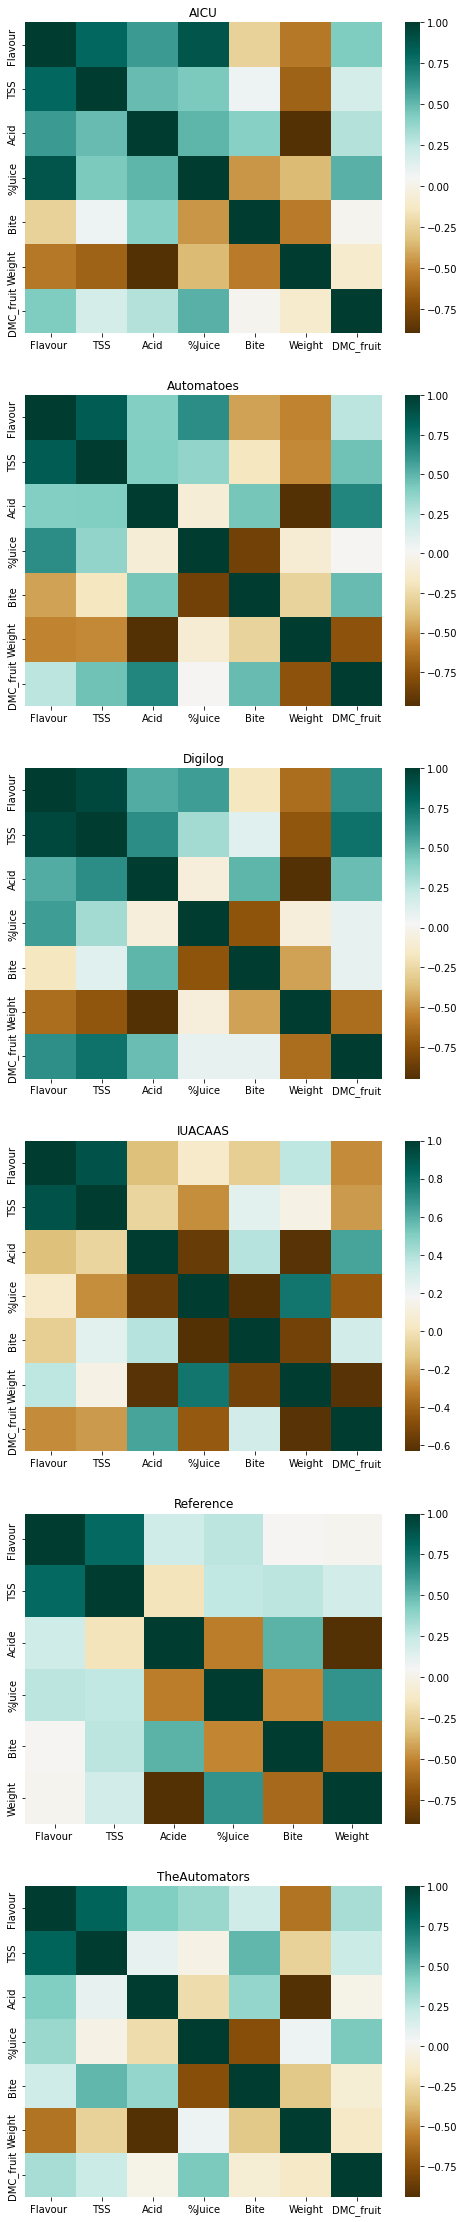

In [16]:
from pandas.plotting import scatter_matrix
k=0
plt.figure(figsize=(8,40))
for i in df:
    df_corr = df[i].corr()
    plt.subplot(6, 1, k + 1)
    g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")
    plt.title(i)
    k=k+1
plt.show()

<Figure size 432x432 with 0 Axes>

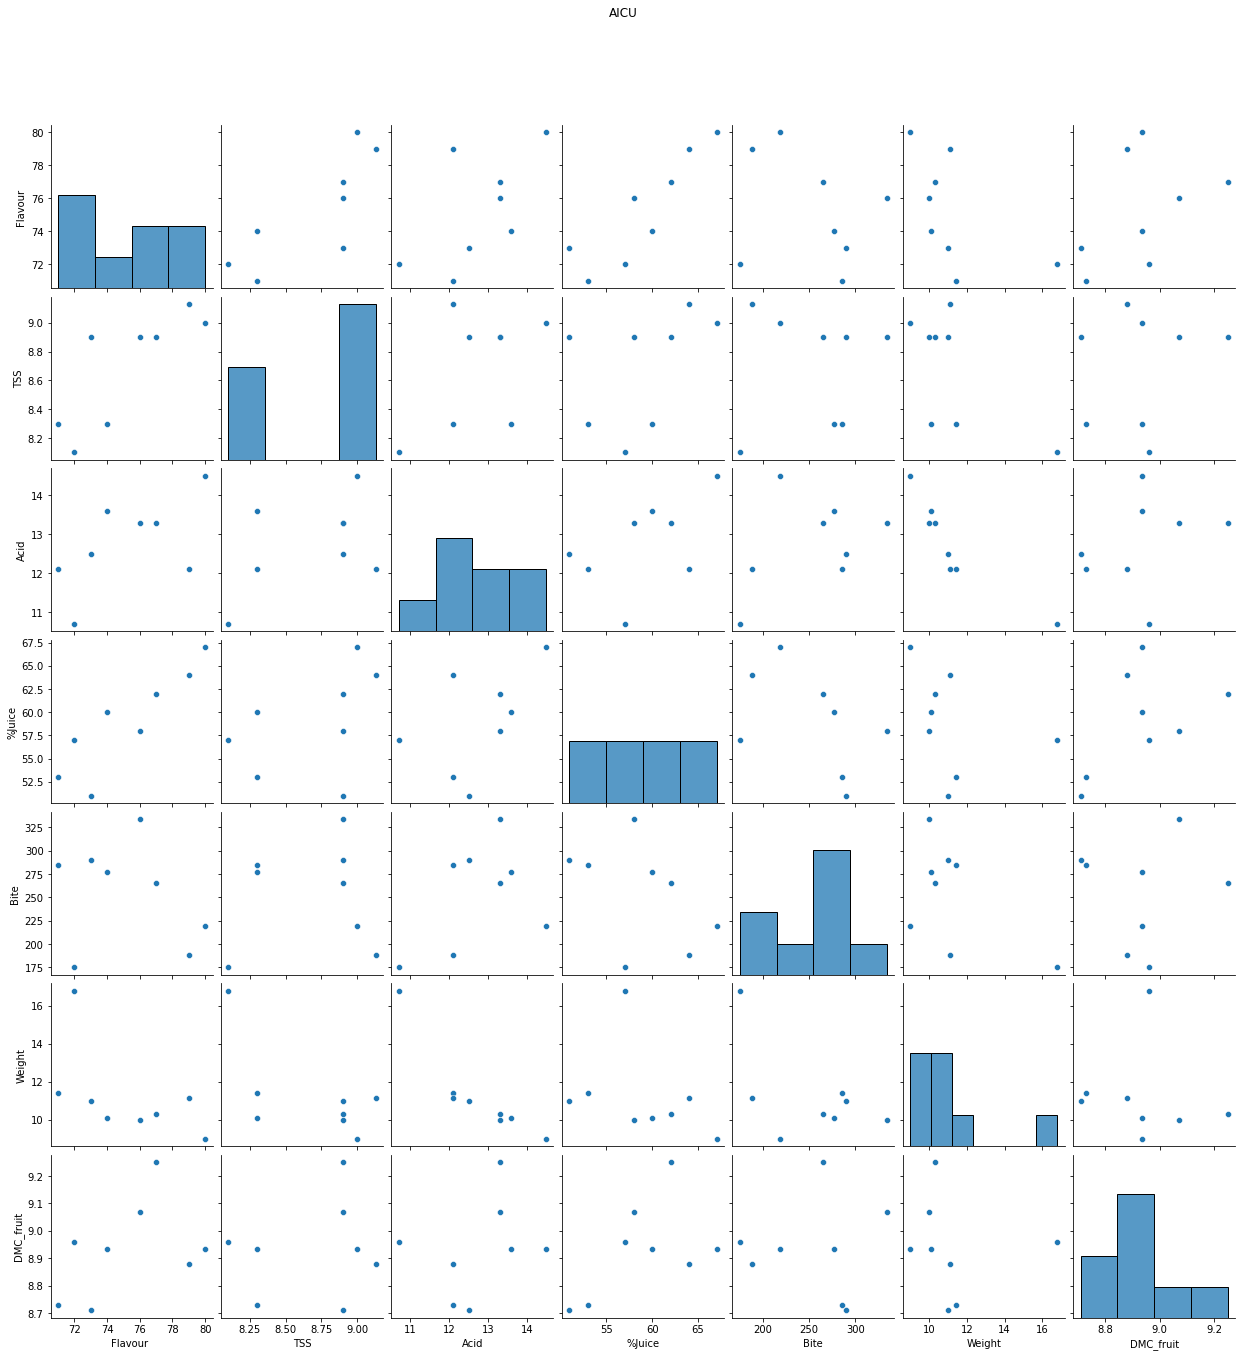

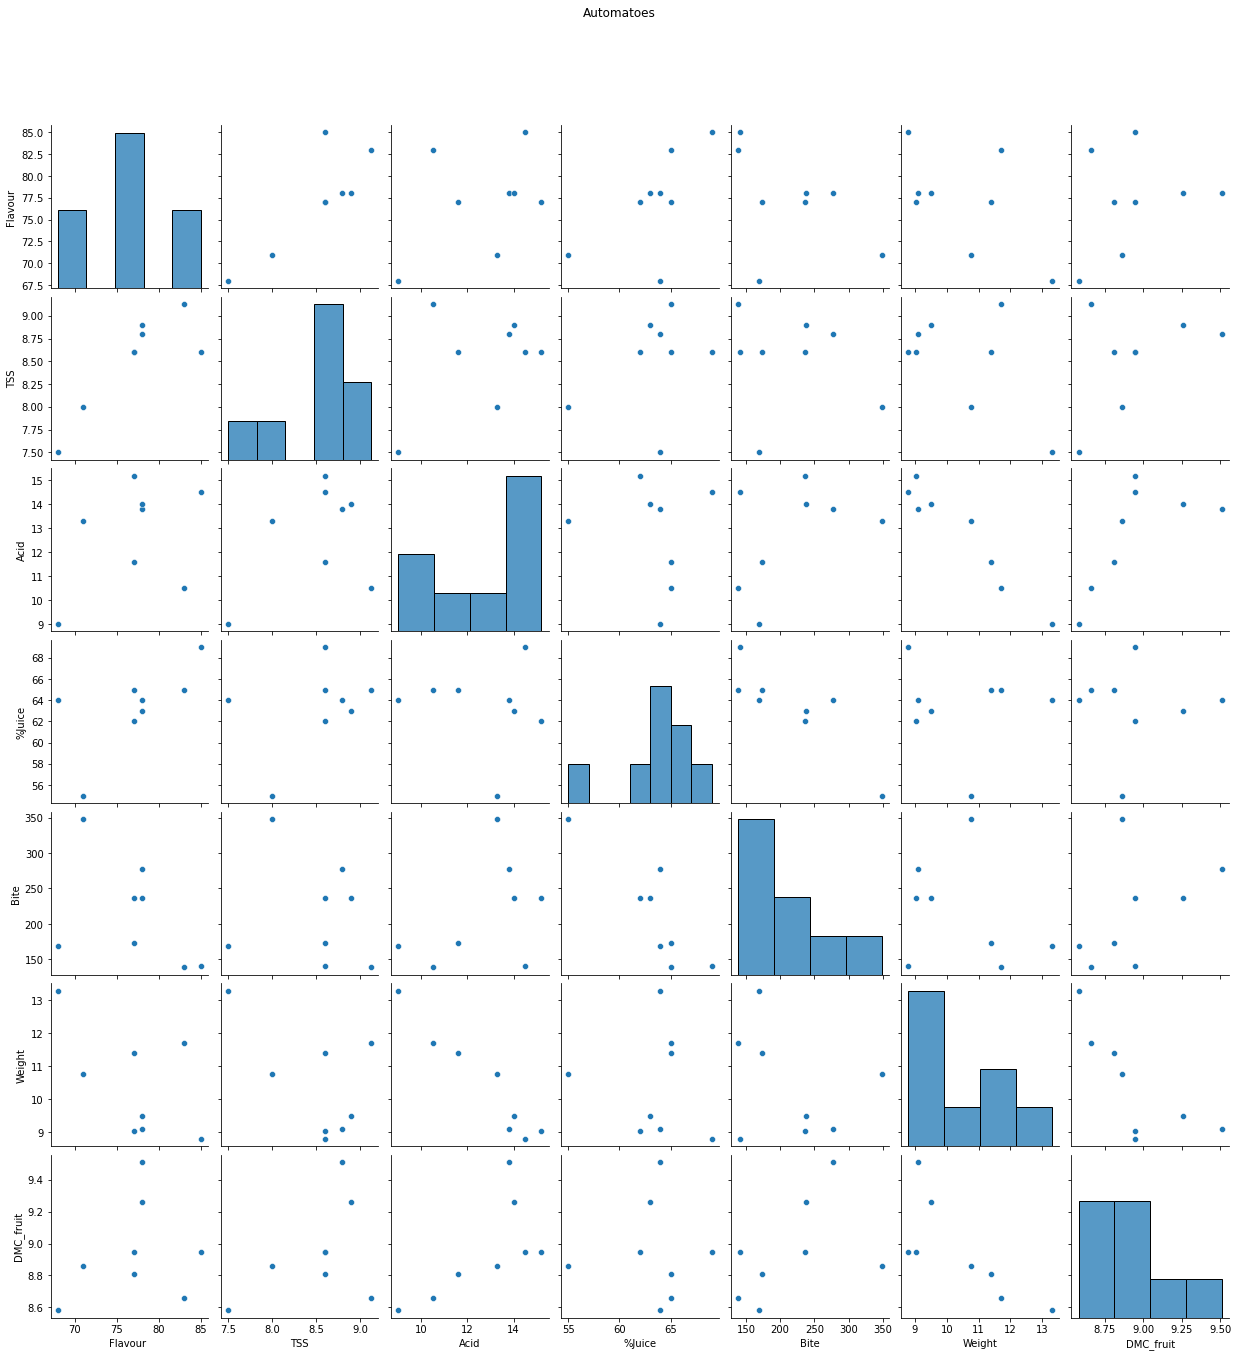

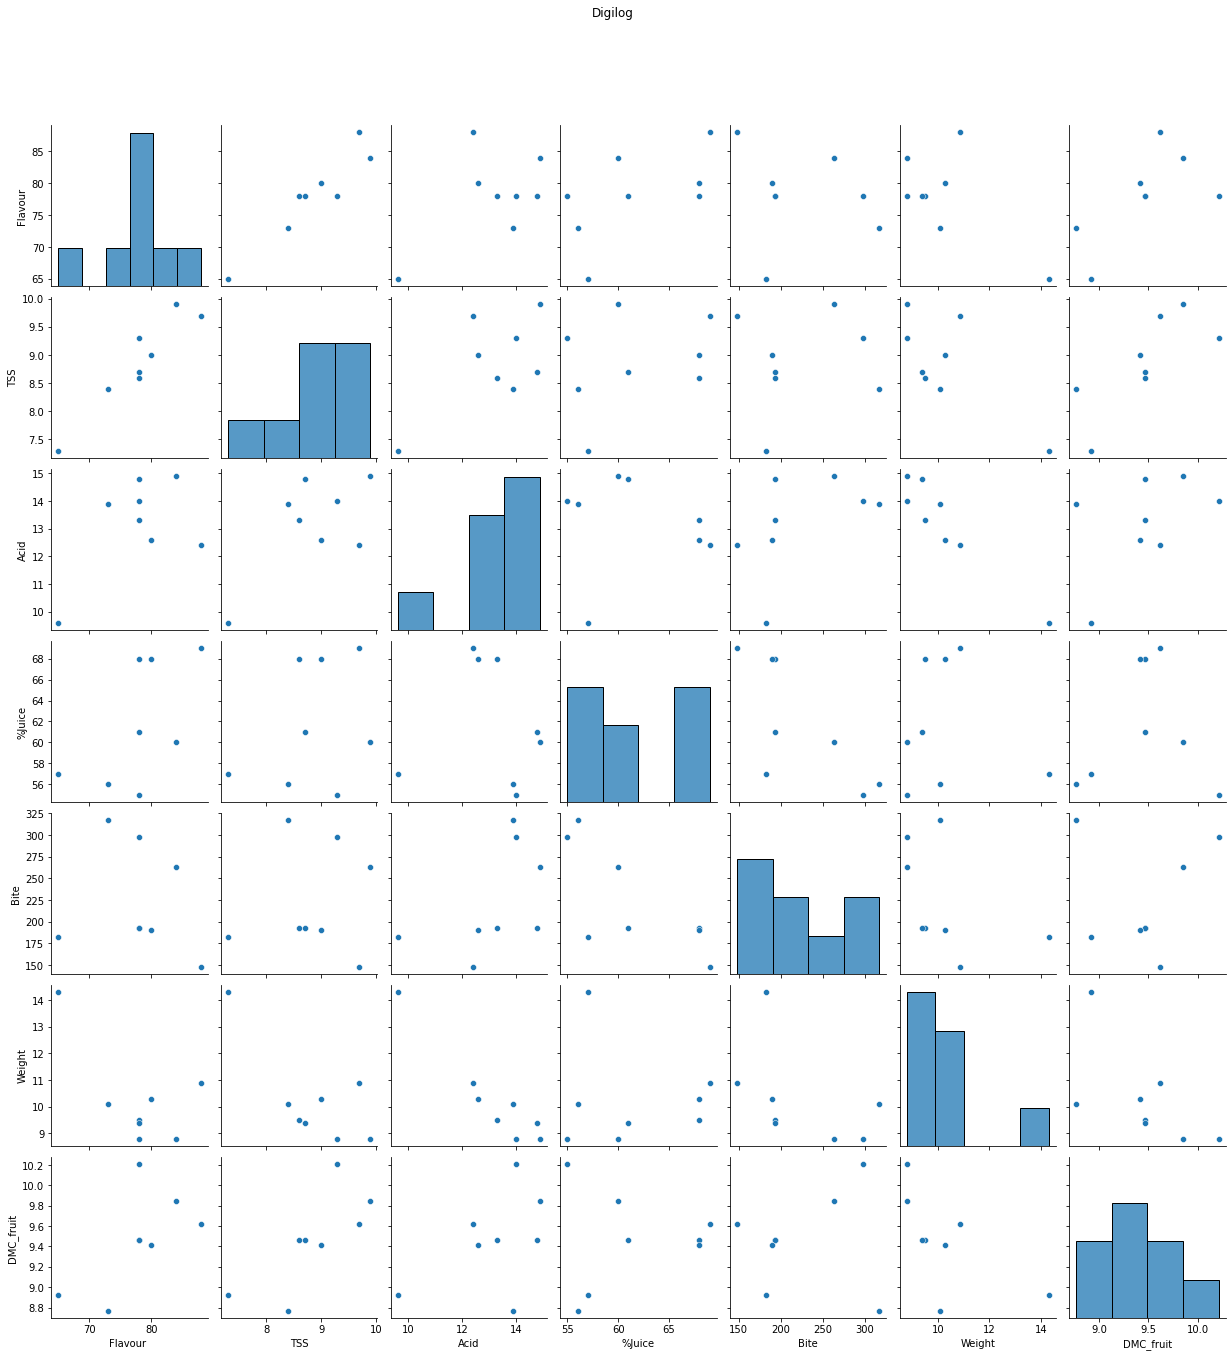

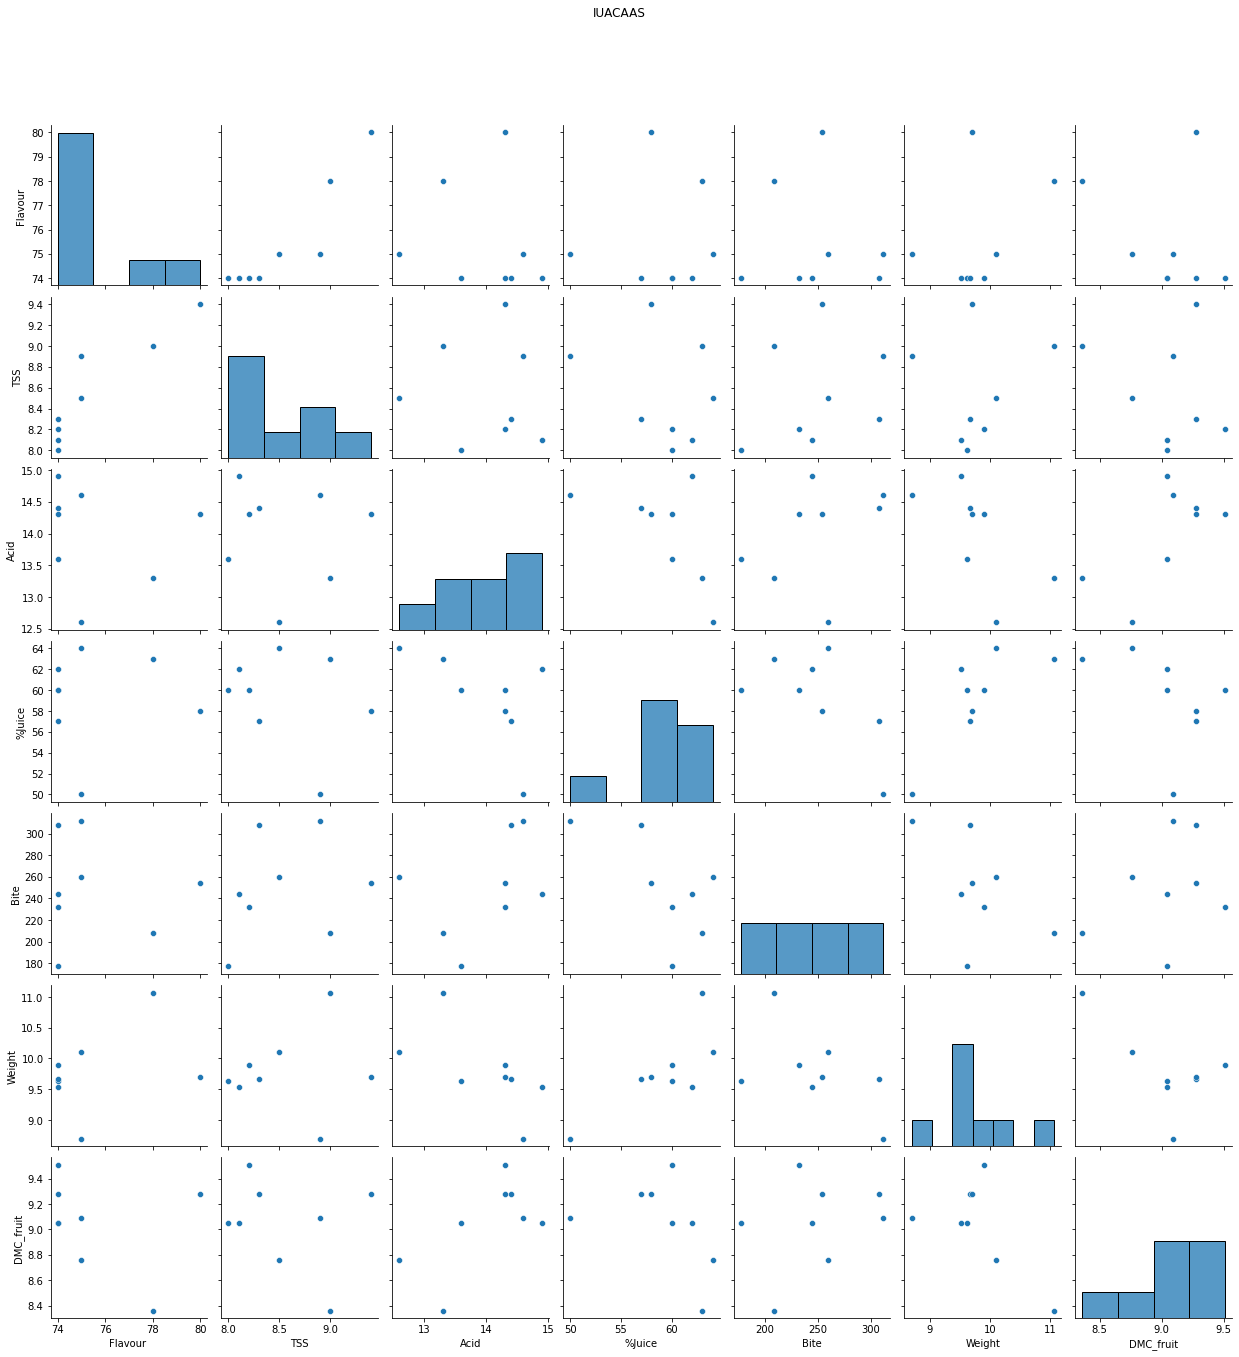

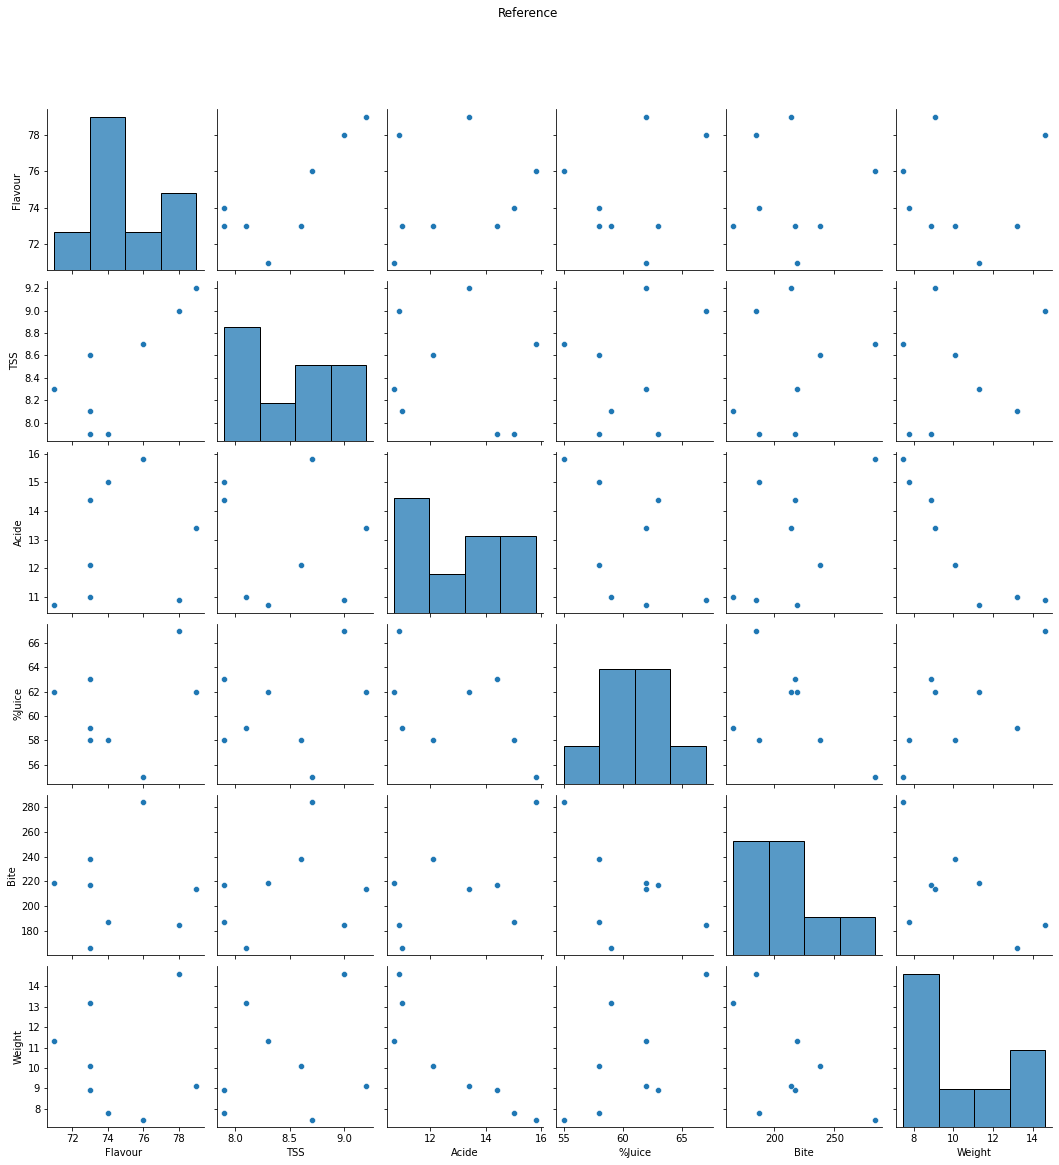

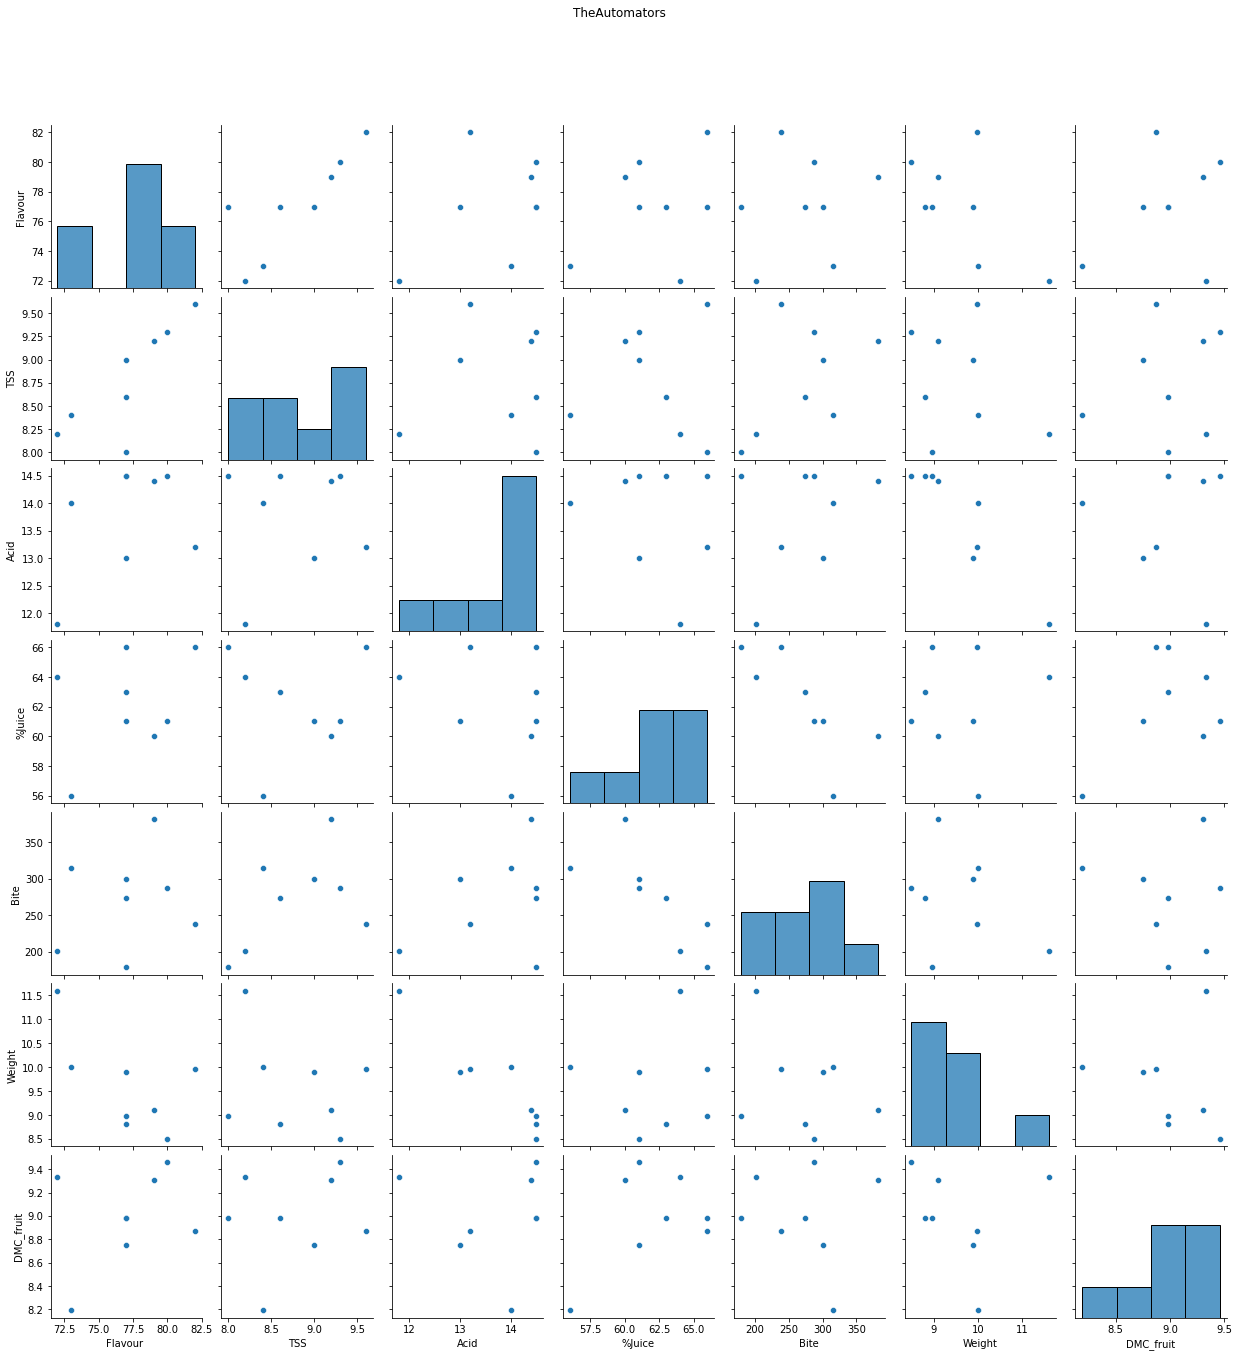

In [17]:
plt.figure(figsize=(6,6))
for j in df:
    g = sns.pairplot(df[j])
    g.fig.suptitle("{}".format(j), y=1.08) # y= some height>1

plt.show()

<Figure size 720x432 with 0 Axes>

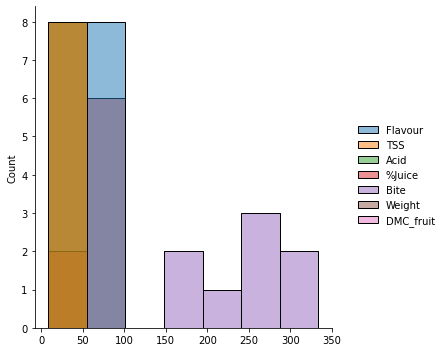

<Figure size 720x432 with 0 Axes>

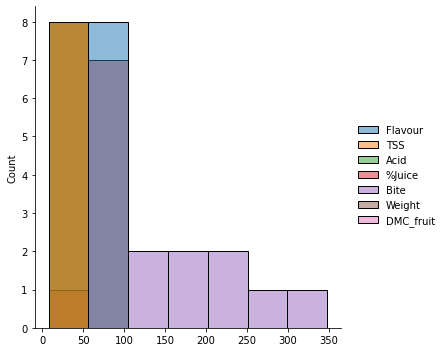

<Figure size 720x432 with 0 Axes>

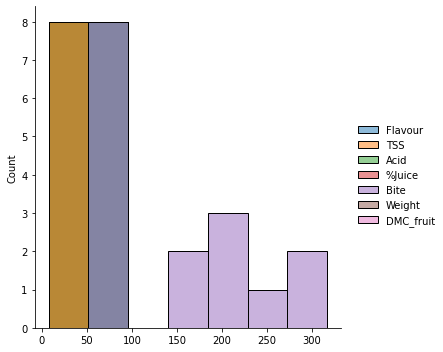

<Figure size 720x432 with 0 Axes>

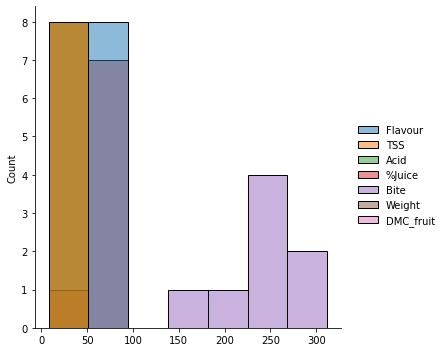

<Figure size 720x432 with 0 Axes>

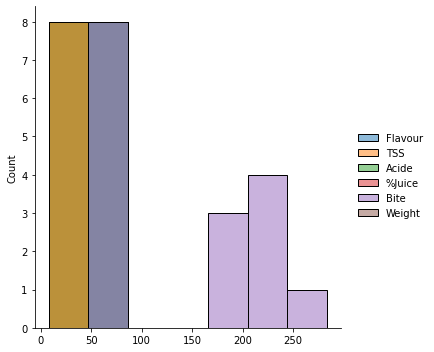

<Figure size 720x432 with 0 Axes>

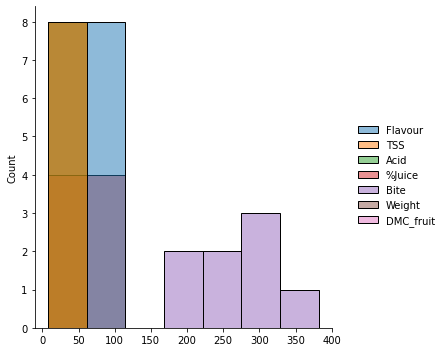

In [18]:
for i in df:
    plt.figure(figsize=(10,6))
    sns.displot(df[i],bins=7)

In [19]:
def plot(target):
    
    k=0
    sns.set()
    plt.figure(figsize=(20, 60),facecolor='lightgray')

    for j in col:
        plt.subplot(6, 1, k + 1)
        for i in df:
            plt.plot(df[i][target], df[i][j])
        plt.legend(files)
        plt.title("{var} vs {target}".format(var=j,target=target))
        plt.xlabel(j)
        plt.ylabel(target)
        k=k+1
    plt.show()
        
    

KeyError: 'Acid'

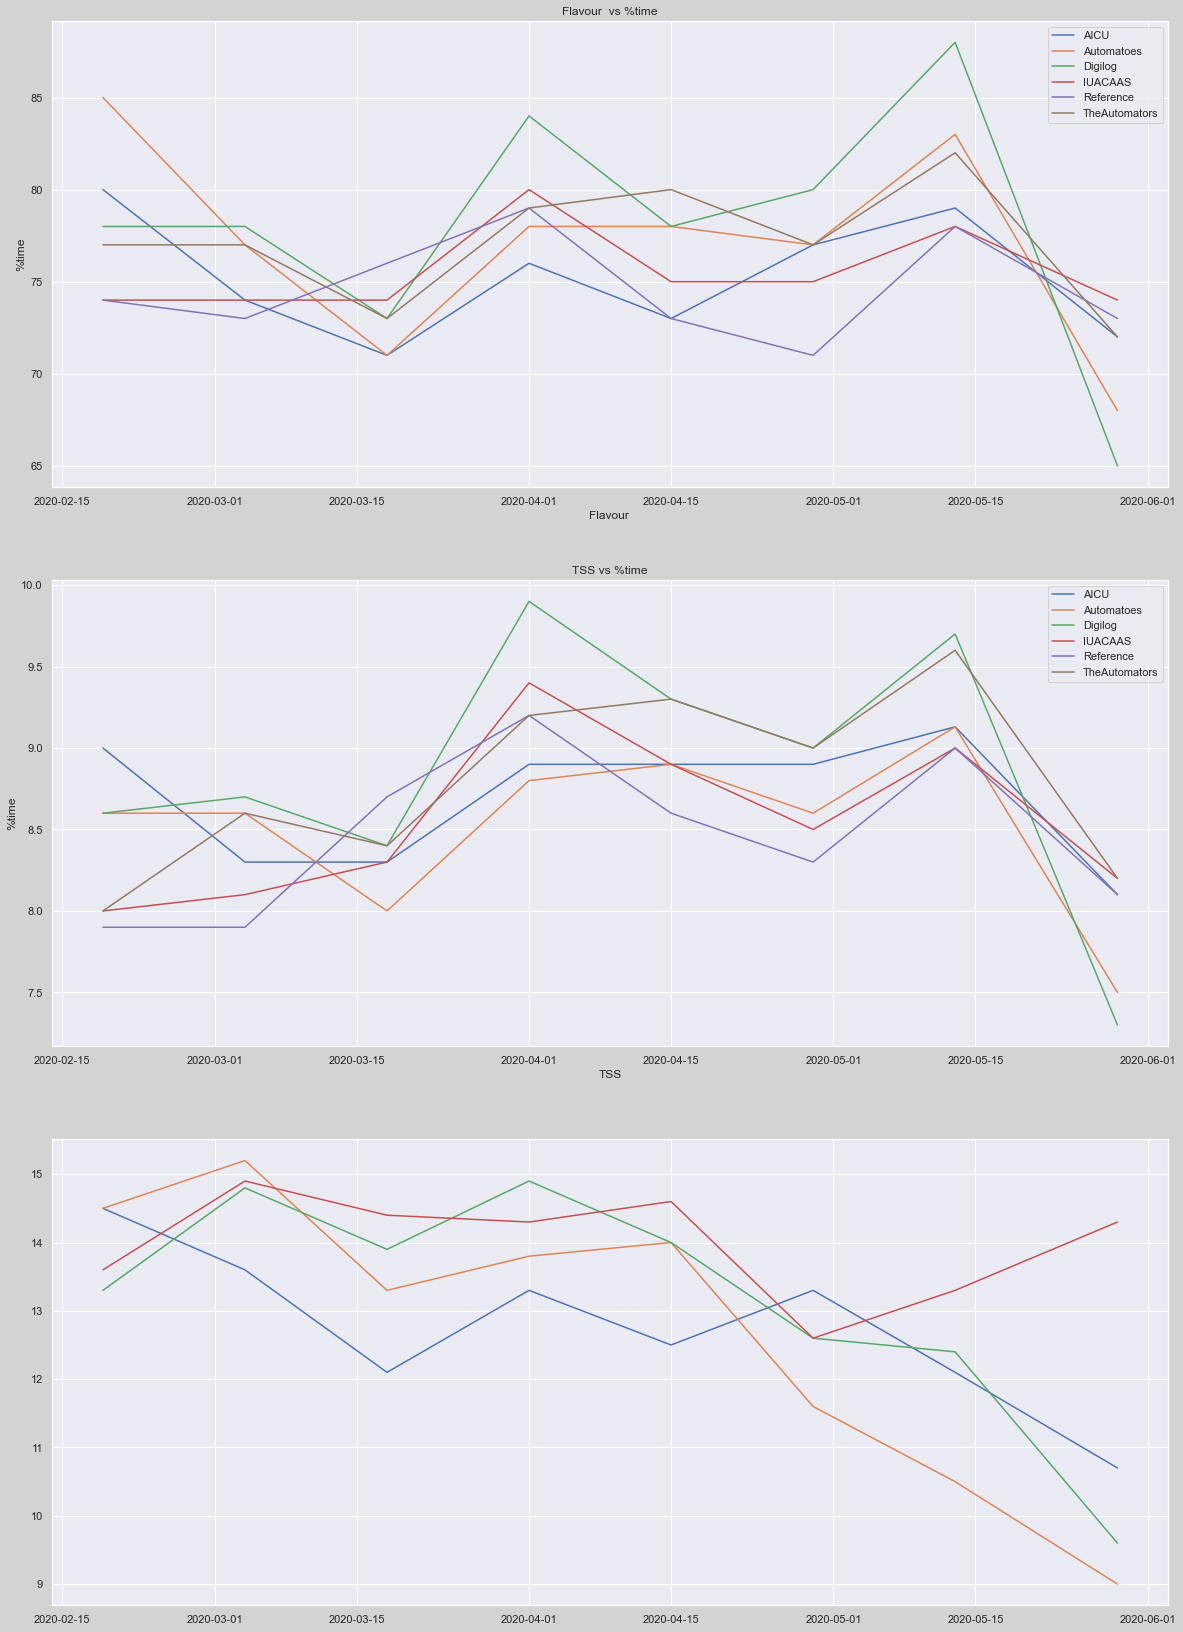

In [20]:
plot('%time')

In [ ]:
#There are naming issues in TomQuality dataset in refernce set, change their names manually.